# Assignment 1: k-Nearest Neighbors multi-classification

In this assignment you'll have to predict the decisions made about cars. There are 4 potential decisions:

- 'unacc': unacceptable
- 'acc', : acceptable
- 'good',: good
- 'vgood': very good

Because there are 4 decision options this is called a multi-class classification problem. Please be aware that these decision categories are ordinal. The "lowest" decision is unacceptable and the "highest" decision is very good. 

Using 6 cars' features you'll try to predict the decision that will be made. These features are stored in the first 6 columns of the dataset. The seventh column contains the decisions made about the cars.

## 1 import and pre-process dataset
- Run the next cell to import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### 1A import data set
- import the csv file cars.csv into a dataframe
- inspect the dataframe to make sure the data is correctly imported. Hint: check the number of rows. 

In [2]:
df = pd.read_csv('cars.csv', header = None )
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### 1B change column names
- Change the names of the columns:
    - First column name: 'buy_price'
    - Second column name: 'maint_cost'
    - Third:'num_doors'
    - Fourth: 'num_persons'
    - Fifth: 'lug_boot'
    - Sixth:'safety'
    - Last: 'decision'
- Check if the column names are correctly changed

In [3]:
df.columns = ['buy_price','maint_cost','num_doors','num_persons','lug_boot','safety','decision']
df

,buy_price,maint_cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### 1C Determine unique values in each columns
- Make 7 lists that show the unique values of each column.
- Hint: the set() function shows unique values.

In [4]:
bp = list(set(df['buy_price']))
mc = list(set(df['maint_cost']))
nd = list(set(df['num_doors']))
np = list(set(df['num_persons']))
lb = list(set(df['lug_boot']))
sy = list(set(df['safety']))
dn = list(set(df['decision']))

display('bp', bp, 'mc', mc, 'nd' , nd , 'np', np, 'lb', lb, 'sy', sy, 'dn', dn)

for i in df.columns:
    print(i)
    print(df[i].unique(),"\n")

'bp'

['low', 'vhigh', 'high', 'med']

'mc'

['low', 'vhigh', 'high', 'med']

'nd'

['2', '5more', '4', '3']

'np'

['2', 'more', '4']

'lb'

['small', 'big', 'med']

'sy'

['low', 'high', 'med']

'dn'

['good', 'acc', 'unacc', 'vgood']

buy_price
['vhigh' 'high' 'med' 'low'] 

maint_cost
['vhigh' 'high' 'med' 'low'] 

num_doors
['2' '3' '4' '5more'] 

num_persons
['2' '4' 'more'] 

lug_boot
['small' 'med' 'big'] 

safety
['low' 'med' 'high'] 

decision
['unacc' 'acc' 'vgood' 'good'] 



In [5]:
for i in df:
    print(f"column name: {i}\n{df[i].unique()} \n")

column name: buy_price
['vhigh' 'high' 'med' 'low'] 

column name: maint_cost
['vhigh' 'high' 'med' 'low'] 

column name: num_doors
['2' '3' '4' '5more'] 

column name: num_persons
['2' '4' 'more'] 

column name: lug_boot
['small' 'med' 'big'] 

column name: safety
['low' 'med' 'high'] 

column name: decision
['unacc' 'acc' 'vgood' 'good'] 



In [6]:
y = {}
for i in df:
    y.update({i:set(df[i])})
y

{'buy_price': {'high', 'low', 'med', 'vhigh'},
 'maint_cost': {'high', 'low', 'med', 'vhigh'},
 'num_doors': {'2', '3', '4', '5more'},
 'num_persons': {'2', '4', 'more'},
 'lug_boot': {'big', 'med', 'small'},
 'safety': {'high', 'low', 'med'},
 'decision': {'acc', 'good', 'unacc', 'vgood'}}

In [7]:
x = pd.DataFrame(data = y.values(), index = y.keys()).T.fillna("")
display(x)

del x, y

,buy_price,maint_cost,num_doors,num_persons,lug_boot,safety,decision
0,low,low,2,2,small,low,good
1,vhigh,vhigh,5more,more,big,high,acc
2,high,high,4,4,med,med,unacc
3,med,med,3,,,,vgood


### 1D convert to numeric values
- Copy the dataframe into a new dataframe
- Change the values in each column into numeric values
- All values are values on an ordinal scale. Because of this the values have to be in the right order. Example: 

    - 'low', 'med', 'high', 'vhigh' should be numbered from low to high. For example 'low' becomes number 1, 'med' becomes number 2, 'high' becomes number 3 etc. A similar way of numbering has to be applied to all columns.

In [73]:
cars = df.copy()

In [74]:
cars

,buy_price,maint_cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [75]:
cars.buy_price.replace(('low', 'med', 'high', 'vhigh'),(1,2,3,4), inplace=True)
cars.maint_cost.replace(('low', 'med', 'high', 'vhigh'),(1,2,3,4), inplace=True)
cars.num_doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
cars.num_persons.replace(('2','4','more'),(1,2,3), inplace=True)
cars.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
cars.safety.replace(('low','med','high'),(1,2,3), inplace=True)
cars.decision.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

array([[<AxesSubplot:title={'center':'buy_price'}>,
        <AxesSubplot:title={'center':'maint_cost'}>,
        <AxesSubplot:title={'center':'num_doors'}>],
       [<AxesSubplot:title={'center':'num_persons'}>,
        <AxesSubplot:title={'center':'lug_boot'}>,
        <AxesSubplot:title={'center':'safety'}>],
       [<AxesSubplot:title={'center':'decision'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

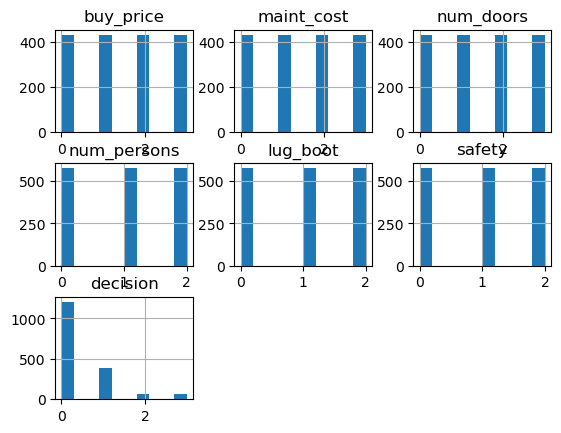

In [12]:
cars.hist()

### 1E Check the dataframe
- Check if there are any missing values or outliers.
- Make a visualation that shows how the values in each column are distributed.
- What do you notice about these distributions?
- Do you think this is a real dataset or a synthetic dataset? Why?

In [13]:
display(cars.describe())

,buy_price,maint_cost,num_doors,num_persons,lug_boot,safety,decision
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [14]:
display(cars.isna().sum())

buy_price      0
maint_cost     0
num_doors      0
num_persons    0
lug_boot       0
safety         0
decision       0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'buy_price'),
  Text(1, 0, 'maint_cost'),
  Text(2, 0, 'num_doors'),
  Text(3, 0, 'num_persons'),
  Text(4, 0, 'lug_boot'),
  Text(5, 0, 'safety'),
  Text(6, 0, 'decision')])

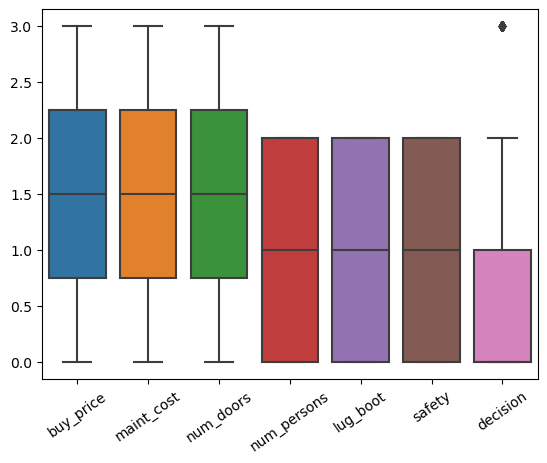

In [15]:
sns.boxplot(data=cars)
plt.xticks(rotation= 35)

In [16]:
#What do you notice about these distributions?
print("They all have a normal distribution shape.")

They all have a normal distribution shape.


In [17]:
#Do you think this is a real dataset or a synthetic dataset? Why?
print("Synthetic. It is too evenly distributed.")

Synthetic. It is too evenly distributed.


## 2 Apply k-nearest neighbors

### 2A Train and test set
- Your goal is to predict the decision column
- Split the data into a train set and a test set
- Explain your choice for the test set size

In [76]:
import time
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X = cars.drop("decision", axis = 1)
y = cars["decision"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

errors = {}
acc = {}

st = time.time()

for i in range(1, 11):
    model = knn = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    error = (mean_squared_error(y_test, predictions)) ** 0.5

    errors.update({i:error})
    acc.update({i:accuracy_score(y_test, predictions)})

et = time.time()
print(f"Time elapsed: {round(et -st, 4)} seconds")

Time elapsed: 0.078 seconds


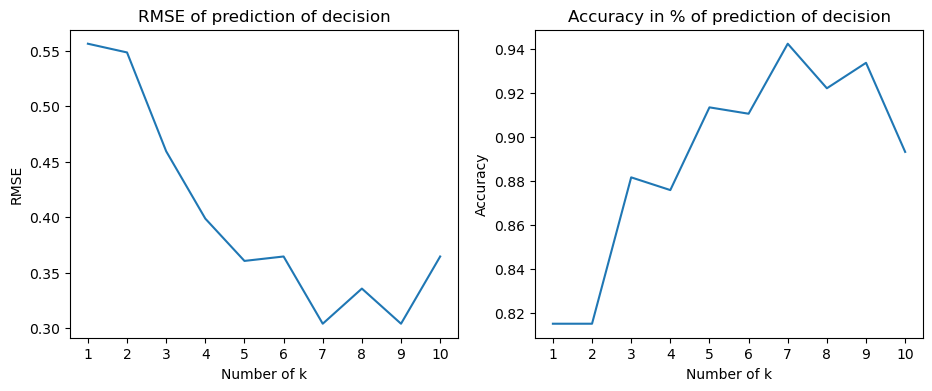

Time elapsed: 0.113 seconds


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
st = time.time()
plt.figure(figsize = (11,4))

plt.subplot(1, 2, 1)
plt.plot(errors.keys(), errors.values())
plt.xticks(range(1,11))
plt.ylabel("RMSE")
plt.xlabel("Number of k")
plt.title("RMSE of prediction of decision")

plt.subplot(1, 2, 2)
plt.plot(acc.keys(), acc.values())
plt.xticks(range(1,11))
plt.ylabel("Accuracy")
plt.xlabel("Number of k")
plt.title("Accuracy in % of prediction of decision")

plt.show()
et = time.time()
print(f"Time elapsed: {round(et -st, 4)} seconds")

In [78]:
from sklearn.model_selection import GridSearchCV

st = time.time()

cv = GridSearchCV(knn, param_grid = {"n_neighbors": list(range(1,11))}, cv = 5)
cv.fit(X_train, y_train)

display((cv.best_params_))

et = time.time()
print(f"Time elapsed: {round(et -st, 4)} seconds")

{'n_neighbors': 7}

Time elapsed: 0.3401 seconds


In [79]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

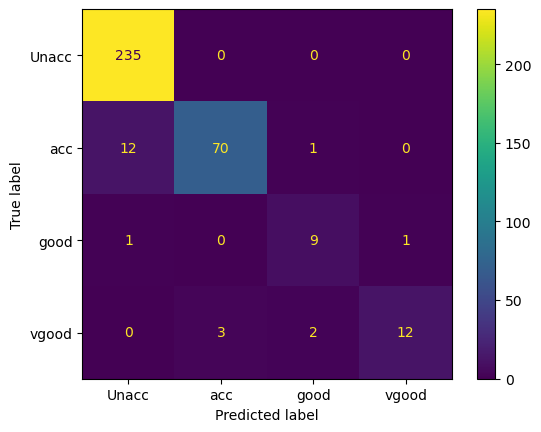

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm, display_labels = ["Unacc", "acc", "good", "vgood"]).plot()

In [90]:
pd.Series(y_test).value_counts()

1    235
2     83
4     17
3     11
Name: decision, dtype: int64

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names = set(df.decision)))

              precision    recall  f1-score   support

        good       0.95      1.00      0.97       235
         acc       0.96      0.84      0.90        83
       unacc       0.75      0.82      0.78        11
       vgood       0.92      0.71      0.80        17

    accuracy                           0.94       346
   macro avg       0.89      0.84      0.86       346
weighted avg       0.94      0.94      0.94       346



In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = cars.drop("decision", axis = 1)
y = cars["decision"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

acc_scores = {}

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    acc_scores.update({i: accuracy_score(y_test, predictions)})

In [25]:
display(max(acc_scores.values()))

0.9421965317919075

In [26]:
# from sklearn.module import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X= cars.drop(columns= "decision").values
y= cars["decision"].values

print(X.shape)
print(y.shape)

#Test size is set to 0.2 because I think 80% of the model is sufficient to make an accurate prediction of the remaining 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


(1728, 6)
(1728,)


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": range(1, 11)}

cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, return_train_score = True)
cv.fit(X_train, y_train)
print(cv.best_params_)

{'n_neighbors': 7}


In [28]:
pd.DataFrame(cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0012,4.002571e-04,0.004201,4.002333e-04,1,{'n_neighbors': 1},0.844765,0.841155,0.811594,0.862319,...,0.843706,0.017944,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.0010,1.907349e-07,0.004801,4.002095e-04,2,{'n_neighbors': 2},0.855596,0.819495,0.818841,0.833333,...,0.829946,0.013841,10,0.906787,0.904072,0.882459,0.914105,0.881555,0.897796,0.013306
2,0.0010,2.431402e-07,0.004201,4.002571e-04,3,{'n_neighbors': 3},0.924188,0.884477,0.873188,0.887681,...,0.893617,0.017292,8,0.961991,0.952941,0.943942,0.952080,0.946655,0.951522,0.006214
3,0.0010,2.336015e-07,0.004601,4.897457e-04,4,{'n_neighbors': 4},0.938628,0.895307,0.894928,0.902174,...,0.906642,0.016302,7,0.940271,0.941176,0.944846,0.941230,0.937613,0.941027,0.002318
4,0.0010,4.101908e-07,0.004801,4.002095e-04,5,{'n_neighbors': 5},0.945848,0.927798,0.920290,0.942029,...,0.932700,0.009640,2,0.973756,0.961086,0.965642,0.963834,0.966546,0.966173,0.004225
5,0.0010,7.539457e-07,0.005001,1.507891e-07,6,{'n_neighbors': 6},0.956679,0.924188,0.909420,0.945652,...,0.929796,0.018447,3,0.962896,0.952036,0.962025,0.957505,0.965642,0.960021,0.004774
6,0.0010,2.780415e-07,0.005001,2.780415e-07,7,{'n_neighbors': 7},0.949458,0.935018,0.923913,0.942029,...,0.934142,0.010900,1,0.970136,0.967421,0.967450,0.968354,0.971971,0.969066,0.001755
7,0.0008,4.000425e-04,0.004801,3.999472e-04,8,{'n_neighbors': 8},0.945848,0.902527,0.887681,0.927536,...,0.915327,0.020070,5,0.956561,0.951131,0.944846,0.956600,0.962025,0.954233,0.005822
8,0.0010,1.168008e-07,0.005001,1.907349e-07,9,{'n_neighbors': 9},0.924188,0.924188,0.884058,0.934783,...,0.918226,0.017578,4,0.949321,0.950226,0.950271,0.959313,0.958409,0.953508,0.004393
9,0.0010,2.611745e-07,0.005001,4.264961e-07,10,{'n_neighbors': 10},0.927798,0.916968,0.902174,0.913043,...,0.911707,0.010510,6,0.936652,0.933937,0.938517,0.940325,0.941230,0.938132,0.002621


### 2B Fit and predict
- Apply the k-nearest neighbor classifier of scikit learn to fit your model.
- Predict the decisions of your test set and determine the accuracy of the model
- Change the number of neighbors the model considers when making the predictions. What happens to the accuracy?
- Find the optimal number of k (number of neighbors)


In [29]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
# print("Predictions: ", predictions)
score = round(accuracy_score(y_test, predictions), 2)
print("The accuracy is: ", score)


The accuracy is:  0.94


In [30]:
#Change the number of neighbors the model considers when making the predictions. What happens to the accuracy?
print("The accuracy is decreasing.")

The accuracy is decreasing.


In [31]:
#Find the optimal number of k (number of neighbors)
print("The optimal number is 7, found by changing the numbers.")

The optimal number is 7, found by changing the numbers.


### 2C Grid search and cross validation

#### 2C.1 parameter grid
- Create a parameter grid for the number of nearest neighbors (n_neighbors). It should include the numbers 1 till 10.

In [32]:
param_grid = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
print(f"n_neighbors: \n{param_grid}")

n_neighbors: 
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


#### 2C.2 Apply grid search
- Import the grid search cv module of sklearn
- Create a grid search object that uses your parameter grid and applies 5-fold cross validation.
- Fit the grid search object

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv= 5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

#### 2C.3 Best parameter setting and best score
- Show the best score and the best parameter setting for the number of neighbors.
- Is this result the same as in 2B? Why or why not?

In [34]:
print("The best parameter is: ", grid_search.best_params_)

The best parameter is:  {'n_neighbors': 7}


#### 2C.4 Dataframe and visualization
- Create a dataframe that shows the results of the grid search
- Visualize the scores of each number of neighbors (1 till 10)

In [35]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0010,9.536743e-08,0.004401,4.899014e-04,1,{'n_neighbors': 1},0.844765,0.841155,0.811594,0.862319,...,0.843706,0.017944,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.0010,1.907349e-07,0.004801,4.003286e-04,2,{'n_neighbors': 2},0.855596,0.819495,0.818841,0.833333,...,0.829946,0.013841,10,0.906787,0.904072,0.882459,0.914105,0.881555,0.897796,0.013306
2,0.0008,4.001380e-04,0.004601,4.899405e-04,3,{'n_neighbors': 3},0.924188,0.884477,0.873188,0.887681,...,0.893617,0.017292,8,0.961991,0.952941,0.943942,0.952080,0.946655,0.951522,0.006214
3,0.0010,3.989506e-07,0.004601,4.899404e-04,4,{'n_neighbors': 4},0.938628,0.895307,0.894928,0.902174,...,0.906642,0.016302,7,0.940271,0.941176,0.944846,0.941230,0.937613,0.941027,0.002318
4,0.0010,3.693565e-07,0.004601,4.899793e-04,5,{'n_neighbors': 5},0.945848,0.927798,0.920290,0.942029,...,0.932700,0.009640,2,0.973756,0.961086,0.965642,0.963834,0.966546,0.966173,0.004225
5,0.0010,2.611745e-07,0.004601,4.899209e-04,6,{'n_neighbors': 6},0.956679,0.924188,0.909420,0.945652,...,0.929796,0.018447,3,0.962896,0.952036,0.962025,0.957505,0.965642,0.960021,0.004774
6,0.0010,1.784161e-07,0.004801,4.000426e-04,7,{'n_neighbors': 7},0.949458,0.935018,0.923913,0.942029,...,0.934142,0.010900,1,0.970136,0.967421,0.967450,0.968354,0.971971,0.969066,0.001755
7,0.0008,4.001143e-04,0.004801,3.998757e-04,8,{'n_neighbors': 8},0.945848,0.902527,0.887681,0.927536,...,0.915327,0.020070,5,0.956561,0.951131,0.944846,0.956600,0.962025,0.954233,0.005822
8,0.0010,1.168008e-07,0.005001,2.431402e-07,9,{'n_neighbors': 9},0.924188,0.924188,0.884058,0.934783,...,0.918226,0.017578,4,0.949321,0.950226,0.950271,0.959313,0.958409,0.953508,0.004393
9,0.0010,2.431402e-07,0.005001,5.436780e-07,10,{'n_neighbors': 10},0.927798,0.916968,0.902174,0.913043,...,0.911707,0.010510,6,0.936652,0.933937,0.938517,0.940325,0.941230,0.938132,0.002621


## 3 Classification metrics

### 3A Confusion matrix
- Do some research to find out what a confusion matrix is. What is it and why is it important for classification?
- Import the confusion matrix module from sklearn metrics
- Create a confusion matrix that compares your predicted decisions with the actual decisions

In [36]:
# Do some research to find out what a confusion matrix is. What is it and why is it important for classification?
print("A confusion matrix is a diagram in where the number of predictions is displayed against the real data. \
It is important because you may want to minimize a specific outcome such as a false positive or false negative.")

A confusion matrix is a diagram in where the number of predictions is displayed against the real data. It is important because you may want to minimize a specific outcome such as a false positive or false negative.


In [37]:
from sklearn.metrics import confusion_matrix
s = confusion_matrix(y_test, predictions)
s

array([[235,   0,   0,   0],
       [ 12,  70,   1,   0],
       [  1,   0,   9,   1],
       [  0,   3,   2,  12]], dtype=int64)

### 3B Confusion matrix plot
A more convenient way to show a confusion matrix is to use the plot_confusion_matrix of scikit learn.
- Import the confusion matrix plot module
- Visualize the confusion matrix in two ways:
    - Show the absolute numbers
    - Show the relative (normalized) numbers
- Some predicted decisions are "higher" than the actual decisions and some are "lower". Explain why that is important in making decisions about cars.

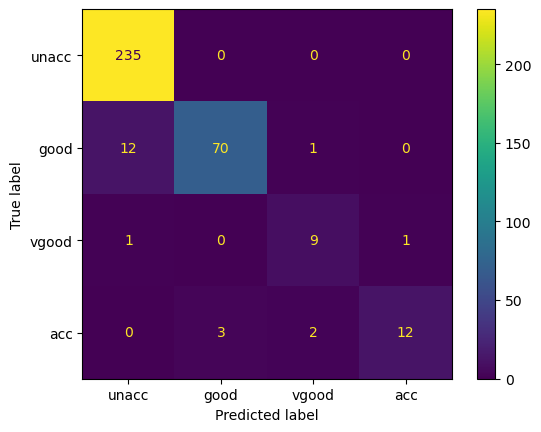

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(s,display_labels=['unacc', 'good', 'vgood', 'acc']).plot()
# ConfusionMatrixDisplay(s, X_test, y_test,display_labels=['unacc', 'good', 'vgood', 'acc'])#,\
#                       cmap=plt.cm.Blues, normalize="true")
# plt.show()

### 3C other metrics
- How would you describe this dataset. To what extent is this a balanced data set?
- Is accuracy a good metric to use here? Why or why not?
- Show a classification report that includes class recall, class precision and f1 scores.
- Explain what precision, recall and f1 score are using examples from the confusion matrix.
- For some classes there is unsufficient evidence. For which classes is this the case and why?
- Which metric is most important in the context of classifying cars and why?

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=['unacc', 'good', 'vgood', 'acc']))

              precision    recall  f1-score   support

       unacc       0.95      1.00      0.97       235
        good       0.96      0.84      0.90        83
       vgood       0.75      0.82      0.78        11
         acc       0.92      0.71      0.80        17

    accuracy                           0.94       346
   macro avg       0.89      0.84      0.86       346
weighted avg       0.94      0.94      0.94       346



In [40]:
print("Precision: of all the predicted positives, what percentage is truly positive.\n\
Recall: of the total positives, what percentage is predicted correctly.\n\
F1: when you want to minimize both false positives and false negatives.")

Precision: of all the predicted positives, what percentage is truly positive.
Recall: of the total positives, what percentage is predicted correctly.
F1: when you want to minimize both false positives and false negatives.
